<a href="https://colab.research.google.com/github/im-ysh/im-ysh/blob/main/CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
data = pd.read_csv("data_day1.csv")

In [3]:
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [6]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data.shape

(569, 31)

In [8]:
data.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [11]:
#sns.countplot(data=data, x='diagnosis')

In [12]:
#! pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

In [13]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.diagnosis.value_counts()

,count
diagnosis,
0,357
1,212


B -- > 0, and M -- > 1

In [15]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
x = data.drop('diagnosis', axis=1)
y = data.diagnosis.values

In [17]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [19]:
x.shape

(569, 30)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
x_train.shape

(455, 30)

In [22]:
y_train.shape

(455,)

In [23]:
x_test.shape

(114, 30)

In [24]:
y_test.shape

(114,)

In [25]:
from torch.utils.data import Dataset, DataLoader

In [26]:
class TabularData(Dataset):
  def __init__(self, x,y):
    super().__init__()
    self.x = torch.from_numpy(x).type(torch.float32)
    self.y = torch.from_numpy(y).type(torch.float32)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, id):
    return self.x[id], self.y[id]

In [27]:
train_data = TabularData(x_train, y_train)

In [28]:
train_data[2]

(tensor([-1.4071, -1.2635, -1.3498, -1.1205, -1.3628, -0.3190, -0.3631, -0.6995,
          1.9327,  0.9686,  0.0167,  1.9017, -0.1277, -0.3700,  0.5657,  0.7770,
          0.3722,  0.6170,  2.5884,  0.7668, -1.2962, -1.0499, -1.2412, -1.0029,
         -1.4908, -0.5500, -0.6356, -0.9705,  0.6168,  0.0529]),
 tensor(0.))

In [29]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

In [30]:
#This code defines a simple binary classifier neural network using PyTorch
# This defines a new neural network model class called BinClr, which inherits from torch.nn.Module (the base class for all neural network modules in PyTorch).

class BinClr(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = torch.nn.Linear(in_features=30, out_features=32) # input layer
    self.layer2 = torch.nn.Linear(in_features=32, out_features=16) # hidden layer
    self.layer3 = torch.nn.Linear(in_features= 16, out_features=1) # output layer
    self.relu = torch.nn.ReLU() # Activation function: Applies ReLU (Rectified Linear Unit), which introduces non-linearity.

  def forward(self, x : torch.Tensor):  #forward Method – Data Flow:how x is passed through network to output

    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
#This defines how input x passes through the network:
# Input x is passed to layer1: shape [batch_size, 30] → [batch_size, 32]
# Apply ReLU
# Pass through layer2: [batch_size, 32] → [batch_size, 16]
# Apply ReLU again
# Pass through layer3: [batch_size, 16] → [batch_size, 1]
# Output: a single value per sample (logit for binary classification)

In [31]:
# # This code defines a simple binary classification neural network using PyTorch, where the model takes 30 input features
# and passes them through two hidden layers (with 32 and 16 neurons) using ReLU activations, and finally outputs a single value (logit) for prediction.
# The layers are organized using `torch.nn.Sequential`, which makes the architecture cleaner and easier to manage.
# The `forward` method simply passes the input through this sequence of layers.
#  It's typically used with a sigmoid activation during inference and trained using a binary classification loss like `BCEWithLogitsLoss`.
class BinClr(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.order = torch.nn.Sequential(
        torch.nn.Linear(in_features=30, out_features=32),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=32, out_features=16),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=16, out_features=1)
    )

  def forward(self, x : torch.Tensor):
    return self.order(x)

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [33]:
device

'cpu'

In [34]:
model = BinClr().to(device)

ReLU stands for Rectified Linear Unit and is a widely used activation function in neural networks. It's defined as f(x) = max(0, x), meaning it outputs the input if it's positive, and zero otherwise. This function introduces non-linearity into neural networks, enabling them to learn complex patterns.

ReLU's "Switch":
ReLU acts like a switch. For positive inputs, it passes them through without change. For negative inputs, it switches them off by setting them to zero. This "switch" introduces a non-linear decision boundary.
Why is this important?:
Without non-linearity, a neural network with multiple layers would essentially act like a single, large linear model. ReLU helps the network learn complex relationships and make more sophisticated predictions.
model

In [35]:
model.state_dict() # display for the columns with weight value

OrderedDict([('order.0.weight',
              tensor([[-9.4077e-02,  8.8329e-02,  7.1980e-02, -1.3402e-01,  1.7489e-01,
                        1.1443e-01, -4.3675e-02, -1.3877e-01, -1.0557e-02,  1.3470e-01,
                        7.5862e-02,  9.9571e-02, -8.8448e-02, -1.7187e-01,  1.2866e-03,
                        3.9419e-02,  1.1972e-01,  1.8252e-02, -1.3314e-01,  9.3170e-02,
                        1.2626e-02, -1.4675e-01,  9.7894e-02, -1.3092e-01,  1.7907e-01,
                        1.3491e-01,  1.0466e-01, -1.0913e-01,  1.2370e-02,  1.4763e-01],
                      [-1.1839e-01, -1.2818e-01, -2.0632e-02, -1.1773e-01, -1.7038e-01,
                       -1.1697e-01,  1.0973e-01,  4.1555e-02, -9.2340e-02,  1.6039e-02,
                       -1.3285e-01, -5.0814e-02,  8.8136e-02, -1.2215e-01, -1.1866e-01,
                       -6.5137e-02,  1.4304e-01,  9.9633e-02,  1.0439e-01,  9.1771e-02,
                        8.3399e-02,  3.7866e-02,  1.4976e-01, -5.3315e-02, -1.2772e-01,

In [36]:
#This line of code takes a batch of data, uses your model to predict the probabilities of the data belonging to class 1,
# applies a threshold of 0.5 to convert probabilities into binary predictions (0 or 1), and then represents those predictions as integers.
(torch.sigmoid(model(next(iter(train_loader))[0].type(torch.float32)))>=0.5).type(torch.int)  # saving with float datatype

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]], dtype=torch.int32)

In [37]:
loss = torch.nn.BCELoss()
optim = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [38]:
#This code trains a model for 15 rounds (called **epochs**).
# In each epoch, it goes through all the training data in small parts (called **batches**). For each batch, it does 4 main steps:
# 1. **Predicts** the output using the model.
# 2. **Calculates the error** (loss) by comparing the prediction with the actual answer.
# 3. **Updates the model** by adjusting weights to reduce the error using backpropagation.
# 4. Keeps track of the loss for the whole epoch.
# At the end of each epoch, it prints the average loss to show how well the model is learning over time.


epochs = 15 # accuarcy is based on this value

for epoch in range(epochs):
  temp_loss = []
  for i, (features, target) in enumerate(train_loader):
    model.train()

    y_pred = torch.sigmoid(model(features))

    loss_fn = loss(y_pred.squeeze(), target)

    temp_loss.append(loss_fn.item())

    optim.zero_grad()

    loss_fn.backward()

    optim.step()

  print(f"Epoch {epoch} | loss: {sum(temp_loss)/len(temp_loss)}")


Epoch 0 | loss: 0.4889198434457444
Epoch 1 | loss: 0.22328233548946547
Epoch 2 | loss: 0.120889385770026
Epoch 3 | loss: 0.08954352208233454
Epoch 4 | loss: 0.07492644760528938
Epoch 5 | loss: 0.0671274290469132
Epoch 6 | loss: 0.06201125429779814
Epoch 7 | loss: 0.0548873583974088
Epoch 8 | loss: 0.05061568614307856
Epoch 9 | loss: 0.047010735265007896
Epoch 10 | loss: 0.04306387743634874
Epoch 11 | loss: 0.039184605018562524
Epoch 12 | loss: 0.03694884900132341
Epoch 13 | loss: 0.03296062382236287
Epoch 14 | loss: 0.03085097567364165


In [39]:
# #accuracy_score
# Tells you how many predictions were correct — like a test score.
# If your model got 8 out of 10 right, accuracy is 0.8 (or 80%).
#confusion_matrix
# Gives a table that shows:
# How many times the model got 1s right (True Positives)
# Got 0s right (True Negatives)
# Mistakenly predicted 1 instead of 0 (False Positives)
# Mistakenly predicted 0 instead of 1 (False Negatives)
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
x_test.shape # 20 % of test data

(114, 30)

In [41]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [42]:
#It gives you the model’s predictions for the test data, as probabilities.
#Converts the result back into a NumPy array so you can use it for checking accuracy or other metrics.
y_pred = torch.sigmoid(model(torch.from_numpy(x_test).type(torch.float32))).detach().numpy()


In [43]:
y_pred = (y_pred>=0.5).astype(int).squeeze()

In [44]:
score = 100*(accuracy_score(y_test, y_pred))

In [45]:
score

98.24561403508771

<Axes: >

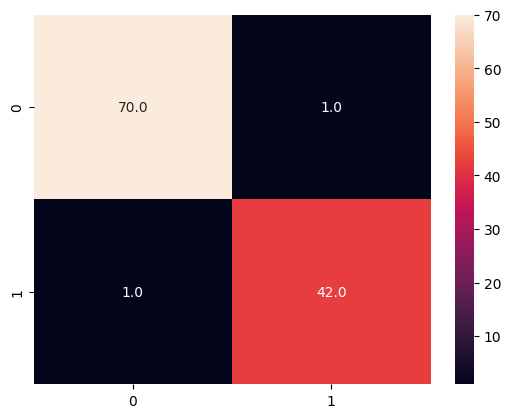

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.1f', annot=True)

In [47]:
#predictive system

In [48]:
patient1 = x_train[1]

In [49]:
result = (torch.sigmoid(model(torch.from_numpy(patient1).type(torch.float32)))>=0.5).type(torch.int)[0]

In [50]:
if result == 0:
  print("It is Benign")
else:
  print("It is Malignant")

It is Malignant
